In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Read the dataset to python environment

In [2]:
#Reading the dataset
data = pd.read_excel('iris.xls')

In [3]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [6]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# 2. Do the necessary pre-processing steps

In [8]:
#checking for missing values
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [9]:
#filling the missing values in the 'SL' column with median
data['SL']=data['SL'].fillna(data['SL'].median())
data['SL'].isna().sum()

0

In [10]:
#filling the missing values in the 'SW' column with median
data['SW']=data['SW'].fillna(data['SW'].median())
data['SW'].isna().sum()

0

In [11]:
#filling the missing values in the 'PL' column with median
data['PL']=data['PL'].fillna(data['PL'].median())
data['PL'].isna().sum()

0

In [12]:
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [13]:
#corelation matrix
data.corr()

,SL,SW,PL,PW
SL,1.000000,-0.099107,0.830554,0.800939
SW,-0.099107,1.000000,-0.405531,-0.338655
PL,0.830554,-0.405531,1.000000,0.936089
PW,0.800939,-0.338655,0.936089,1.000000


<AxesSubplot:>

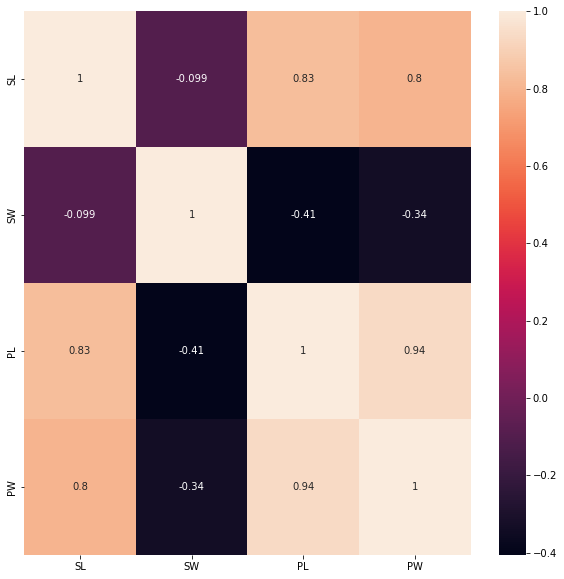

In [14]:
corr = data.corr()
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True,ax=ax)

In [15]:
#Label encoder
from sklearn.preprocessing import LabelEncoder

In [16]:
le= LabelEncoder()

In [17]:
data['Classification']=le.fit_transform(data['Classification'])
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# 3. Find out which classification model gives the best result (also do random forest algorithm)

In [18]:
#model training
from sklearn.model_selection import train_test_split

In [19]:
x= data.drop(columns=['Classification'])
y= data['Classification']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)

In [20]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [21]:
model.fit(x_train,y_train)

LogisticRegression()

In [22]:
model.score(x_test, y_test)

1.0

In [23]:
# print metric to get performance
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 100.0


In [24]:
# knn - k nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [25]:
kn.fit(x_train,y_train)
kn.score(x_test, y_test)

0.9777777777777777

In [26]:
print("Accuracy:",kn.score(x_test,y_test)*100)

Accuracy: 97.77777777777777


In [27]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [28]:
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.9333333333333333

In [29]:
print("Accuracy:",dt.score(x_test,y_test)*100)

Accuracy: 93.33333333333333


In [30]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [31]:
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.9786430868167203

In [32]:
print("Accuracy:",rf.score(x_test,y_test)*100)

Accuracy: 97.86430868167203


In [ ]:
## We got 100% accuracy in Logistic Regression